# Assignment 2: Statistical Treatment for Retail Datasets

## Reading the database

In [21]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image


In [22]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [23]:
from scipy.stats import uniform

In [24]:
file = 'nyc-rolling-sales.csv'
missing_values = ['n/a', 'na', '-']
df_data = pd.read_csv(file, na_values=missing_values)


In [25]:
# showing top 10 of the data
df_data.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [26]:
# checking columns of the data
df_data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [27]:
# checking data shape
df_data.shape

(84548, 22)

In [28]:
# checking the data
df_data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [29]:
# checking null data
df_data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [30]:
# Finding out total units in every NEIGHBORHOOD
df1 = pd.DataFrame({'Unit Total' : df_data.groupby(['NEIGHBORHOOD'])['TOTAL UNITS'].sum()}).reset_index()
print(df1.to_string())

                  NEIGHBORHOOD  Unit Total
0           AIRPORT LA GUARDIA          15
1                ALPHABET CITY         567
2                     ANNADALE         229
3                ARDEN HEIGHTS         313
4                     ARROCHAR          65
5         ARROCHAR-SHORE ACRES          35
6                      ARVERNE         329
7                      ASTORIA        3830
8                   BATH BEACH         537
9                     BATHGATE         205
10                   BAY RIDGE        1339
11                  BAYCHESTER         715
12                     BAYSIDE        1527
13        BEDFORD PARK/NORWOOD         991
14          BEDFORD STUYVESANT        3988
15                  BEECHHURST          91
16                BELLE HARBOR         138
17                   BELLEROSE         301
18                     BELMONT         663
19                 BENSONHURST        1447
20                BERGEN BEACH         297
21                  BLOOMFIELD           4
22         

In [31]:
# Finding out BUILDING CLASS CATEGORY in NYC
df2 = pd.DataFrame({'Unit Total' : df_data.groupby(['BUILDING CLASS CATEGORY'])['TOTAL UNITS'].sum()}).reset_index()
df2.sort_values(by='Unit Total', ascending=False)

,BUILDING CLASS CATEGORY,Unit Total
6,07 RENTALS - WALKUP APARTMENTS,39989
1,02 TWO FAMILY DWELLINGS,32451
7,08 RENTALS - ELEVATOR APARTMENTS,31179
0,01 ONE FAMILY DWELLINGS,18648
2,03 THREE FAMILY DWELLINGS,13137
9,10 COOPS - ELEVATOR APARTMENTS,12677
13,13 CONDOS - ELEVATOR APARTMENTS,12483
14,14 RENTALS - 4-10 UNIT,3587
20,22 STORE BUILDINGS,2988
23,26 OTHER HOTELS,2972


In [32]:
max_commercialinnyc = max(df_data['COMMERCIAL UNITS'])
print(max_commercialinnyc)

2261


In [34]:
# showing properties data difference by build-year
df3 = pd.DataFrame({'Unit Total' : df_data.groupby(['YEAR BUILT'])['TOTAL UNITS'].sum()}).reset_index()
df3.sort_values(by='Unit Total', ascending=False).reset_index()
df3

,YEAR BUILT,Unit Total
0,0,4443
1,1111,0
2,1680,1
3,1800,43
4,1826,1
...,...,...
153,2013,1749
154,2014,3553
155,2015,4159
156,2016,3335


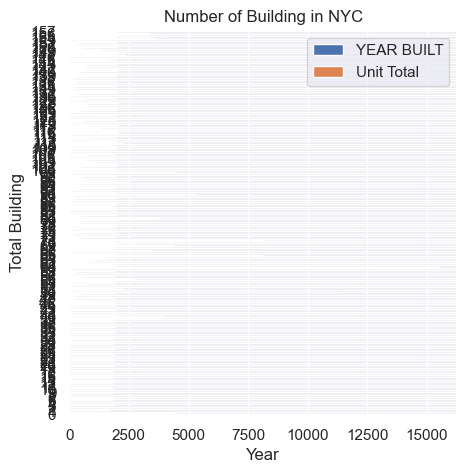

In [41]:
df3.plot(kind='barh')

plt.title('Number of Building in NYC')
plt.xlabel('Year')
plt.ylabel('Total Building')

plt.show()